<a href="https://colab.research.google.com/github/fatihgumuss/machine-learning-and-nlp/blob/main/NLP_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import spacy
import matplotlib.pyplot as plt

book_urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",
    "https://www.gutenberg.org/files/1342/1342-0.txt",
    "https://www.gutenberg.org/files/1661/1661-0.txt",
    "https://www.gutenberg.org/files/2701/2701-0.txt",
    "https://www.gutenberg.org/files/4300/4300-0.txt",
]

corpora = []

for url in book_urls:
    response = requests.get(url)
    response.encoding = "utf-8"
    corpus = response.text
    corpora.append(corpus)

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1600000
docs = [nlp(corpus) for corpus in corpora]

Exception ignored in: <function _xla_gc_callback at 0x7f8a676323a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


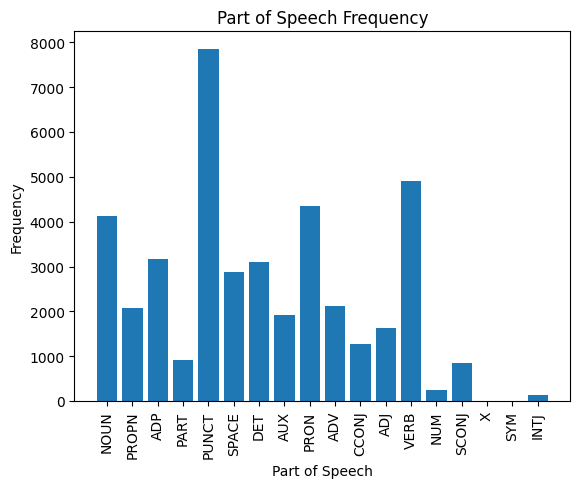

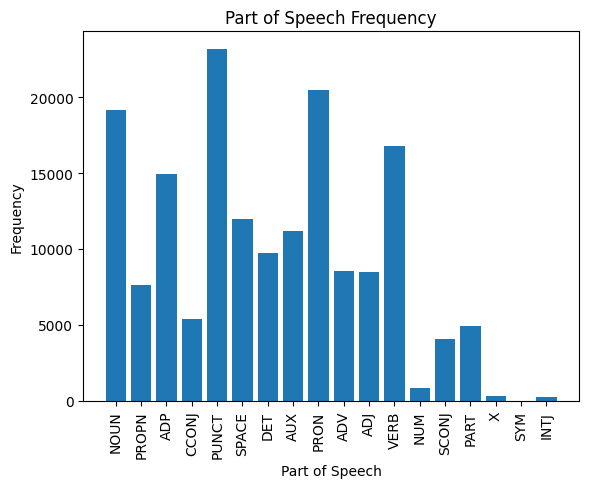

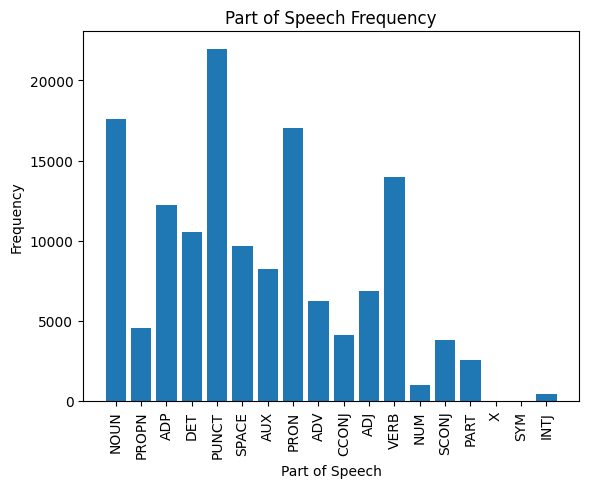

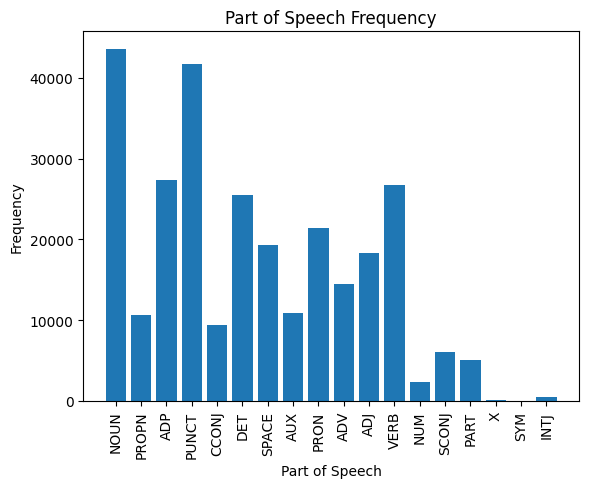

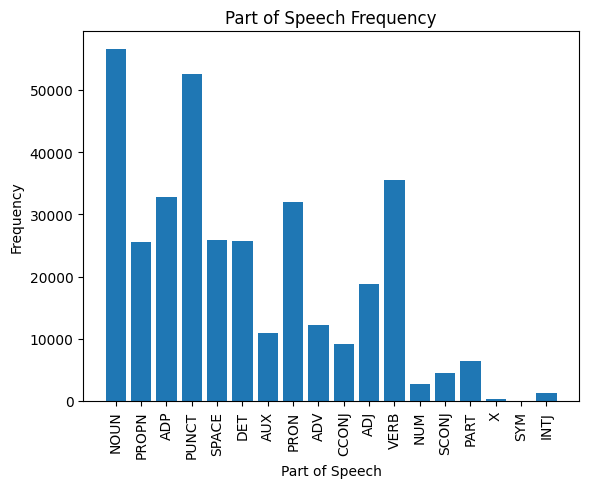

In [ ]:
for doc in docs:
    pos_freq = {}
    for token in doc:
        if token.pos_ not in pos_freq:
            pos_freq[token.pos_] = 1
        else:
            pos_freq[token.pos_] += 1
    plt.bar(pos_freq.keys(), pos_freq.values())
    plt.title("Part of Speech Frequency")
    plt.xlabel("Part of Speech")
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
    plt.show()


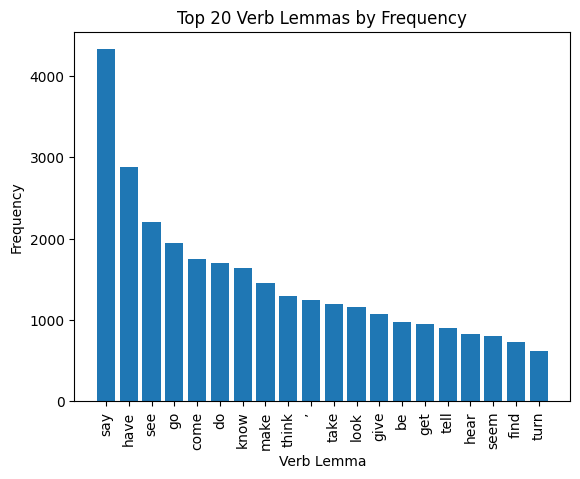

In [ ]:
from collections import Counter

verb_lemmas = []
for doc in docs:
    verb_lemmas.extend([token.lemma_ for token in doc if token.pos_ == "VERB"])

verb_freq = Counter(verb_lemmas)
top_20_verbs = verb_freq.most_common(20)

plt.bar([x[0] for x in top_20_verbs], [x[1] for x in top_20_verbs])
plt.title("Top 20 Verb Lemmas by Frequency")
plt.xlabel("Verb Lemma")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

noun_lemmas_list = []
for doc in docs:
    noun_lemmas = [token.lemma_ for token in doc if token.pos_ == "NOUN"]
    noun_lemmas_list.append(" ".join(noun_lemmas))

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(noun_lemmas_list)

feature_names = vectorizer.get_feature_names_out()

print(tfidf_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00235896 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00070697 0.         0.        ]
 [0.00105606 0.00105606 0.         ... 0.         0.00105606 0.00105606]]


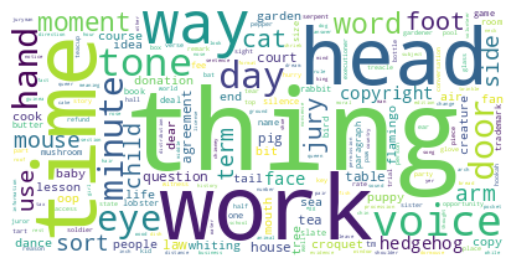

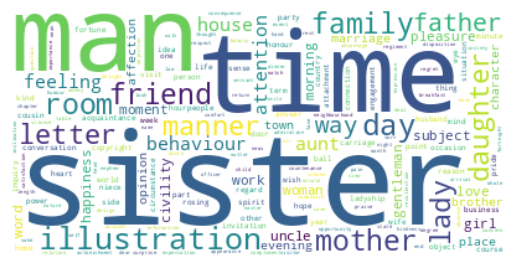

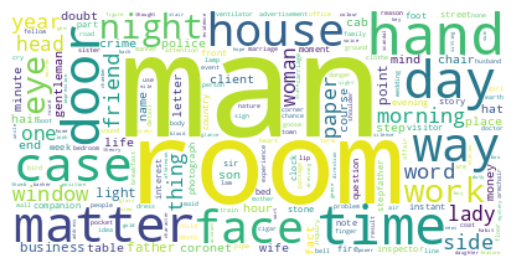

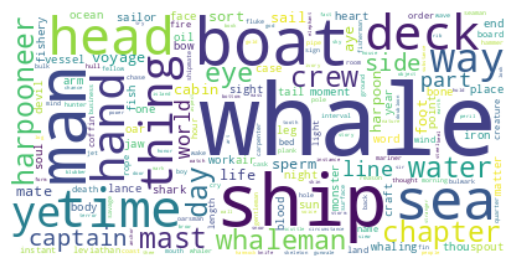

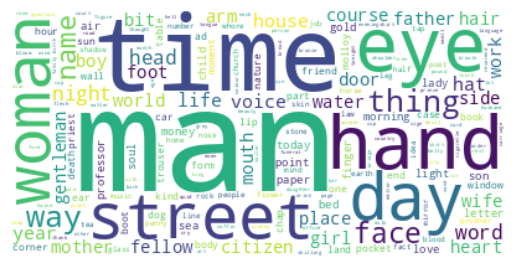

In [ ]:
from wordcloud import WordCloud

for i in range(len(corpora)):
    freq = tfidf_matrix.toarray()[i]
    counts = {}
    for j, featureName in enumerate(feature_names):
        counts[featureName] = freq[j]
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(counts)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()